# K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Kmeans 객체를 생성하고 군집화 수행

In [3]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state=0)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

**labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 df에 'cluster'컬럼으로 추가**

In [4]:
print(kmeans.labels_)
print(kmeans.predict(df))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [5]:
df['cluster']=kmeans.labels_

In [6]:
df['target'] = iris.target
df_result = df.groupby(['target','cluster'])['sepal length (cm)'].count()
print(df_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal length (cm), dtype: int64


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원 축소

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


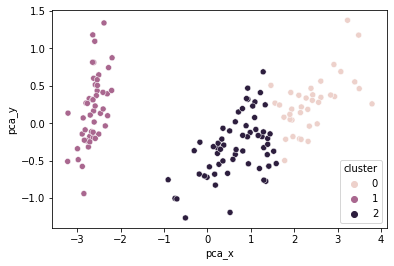

In [9]:
import seaborn as sns

sns.scatterplot(data= df, x=df.loc[:, 'pca_x'], y = df.loc[:,'pca_y'], hue = 'cluster')

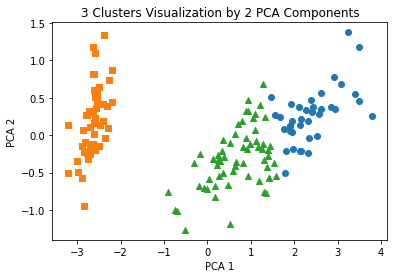

In [10]:
# cluster 값이 0, 1, 2 인 경우마다 별로의 index로 추출

marker0_ind = df[df['cluster'] == 0].index
marker1_ind = df[df['cluster'] == 1].index
marker2_ind = df[df['cluster'] == 2].index

# cluster값 0, 1, 2에 해당하는 index로 각 cluster 레벨의 pca_x, pca_y 값 추출, o, s, ^로 marker 표시
plt.scatter(x=df.loc[marker0_ind,'pca_x'], y=df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=df.loc[marker1_ind,'pca_x'], y=df.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=df.loc[marker2_ind,'pca_x'], y=df.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

## Clustering 알고리즘 테스트를 위한 데이터 생성

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [16]:
cluster_df = pd.DataFrame(data = X, columns=['ftr1','ftr2'])
cluster_df['target'] = y
cluster_df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


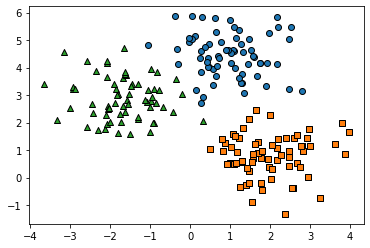

In [18]:
target_list = np.unique(y)
# 각 target별 scatter plot 의 marker 값들. 
markers=['o', 's', '^', 'P','D','H','x']
# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

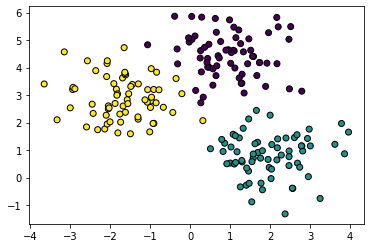

In [19]:
target_list = np.unique(y)
plt.scatter(x=cluster_df['ftr1'], y=cluster_df['ftr2'], edgecolor='k', c=y )

K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화

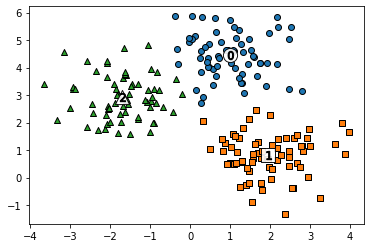

In [25]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k',
              marker = markers[label])
  
  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
              marker='$%d$' % label)

In [26]:
centers

array([[ 0.990103  ,  4.44666506],
       [ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224]])

In [29]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64
